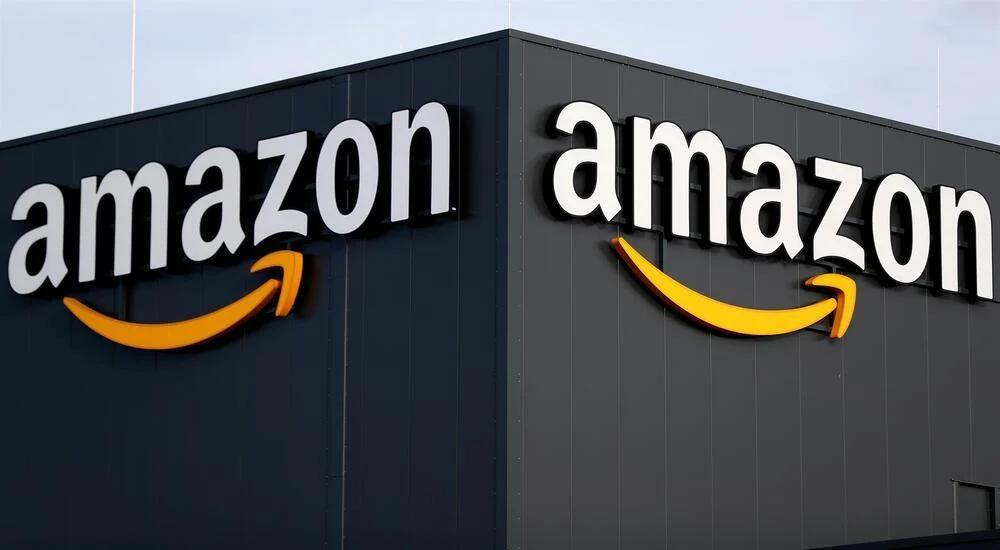

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shutil
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon/amazon irket.webp
/kaggle/input/amazon-sales-dataset/amazon.csv


# Uploading a Dataset

In [2]:
df = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')

In [3]:
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ399   
1  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
2  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
3  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ329   
4  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ154   

  actual_price discount_percentage rating rating_count  \
0       ‚Çπ1,099                 64%    4.2       24,269   
1         ‚Çπ349                 43%    4.0       43,994   
2       ‚Çπ1,899                 90%    3.9        7,928   
3         ‚Çπ699                 53%    4.2       94,363   
4         ‚Çπ399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

# Data Attributes

In [4]:
def veri√∂zellikleri(dataframe,head=True):
    print("------------------------------------INFO--------------------------------------------")
    print(dataframe.info())
    print("------------------------------------SHAPE-------------------------------------------")
    print(dataframe.shape)
    print("------------------------------------ISNULL------------------------------------------")
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print("------------------------------------NUNƒ∞QUE-----------------------------------------")
    print(dataframe.nunique())
    print("------------------------------------DESCRƒ∞BE----------------------------------------")
    display(dataframe.describe())
    if head:
       print("------------------------------------HEAD--------------------------------------------")
       display(dataframe.head())
       print("------------------------------------TAƒ∞L--------------------------------------------")
       display(dataframe.tail())

In [5]:
veri√∂zellikleri(df)

------------------------------------INFO--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link           

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ‚Çπ999                 50%    4.1        9,378   
freq            120                  56    244            9   

                                            about_product  \
count                                                1465   
unique                                               1293   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     Worked on iPhone 7 and didn‚Äôt work on XR,Good ...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1212   
top     I am not big on camera usage, personally. I wa...   
freq                                                    8   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link  
count                                                1465  
unique                                               1465  
top     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
freq                                                    1

------------------------------------HEAD--------------------------------------------


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ399   
1  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
2  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
3  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ329   
4  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ154   

  actual_price discount_percentage rating rating_count  \
0       ‚Çπ1,099                 64%    4.2       24,269   
1         ‚Çπ349                 43%    4.0       43,994   
2       ‚Çπ1,899                 90%    3.9        7,928   
3         ‚Çπ699                 53%    4.2       94,363   
4         ‚Çπ399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

------------------------------------TAƒ∞L--------------------------------------------


product_id                                       product_name  \
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ‚Çπ379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ‚Çπ2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ‚Çπ2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ‚Çπ1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ‚Çπ2,863   

     actual_price discount_percentage rating rating_count  \
1460         ‚Çπ919                 59%      4        1,090   
1461       ‚Çπ3,045                 25%    4.1        4,118   
1462       ‚Çπ3,080                 28%    3.6          468   
1463       ‚Çπ1,890                 26%      4        8,031   
1464       ‚Çπ3,690                 22%    4.3        6,987   

                                          about_product  \
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification √¢‚Ç¨‚Äú 23V ~ 5Hz;1 W...   

                                                user_id  \
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
1460  Prabha ds,Raghuram bk,Real Deal,Amazon Custome...   
1461  Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...   
1462  Nehal Desai,Danish Parwez,Amazon Customer,Amaz...   
1463  Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...   
1464  Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...   

                                              review_id  \
1460  R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...   
1461  R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...   
1462  R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...   
1463  R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...   
1464  R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...   

                                           review_title  \
1460  Received the product without spanner,Excellent...   
1461  ok,everything was good couldn't return bcoz I ...   
1462  very good,Work but front melt after 2 month,Go...   
1463  Fan Speed is slow,Good quality,Good product,go...   
1464  Works perfect,Ok good product,Nice Product. Re...   

                                         review_content  \
1460  I received product without spanner,Excellent p...   
1461  ok,got everything as mentioned but the measuri...   
1462  plastic but cool body ,u have to find sturdy s...   
1463  I have installed this in my kitchen working fi...   
1464  It does it job perfectly..only issue is temp c...   

                                               img_link  \
1460  https://m.media-amazon.com/images/I/41fDdRtjfx...   
1461  https://m.media-amazon.com/images/I/41gzDxk4+k...   
1462  https://m.media-amazon.com/images/W/WEBP_40237...   
1463  https://m.media-amazon.com/images/W/WEBP_40237...   
1464  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  
1460  https://www.amazon.in/Noir-Aqua-Spanner-Purifi...  
1461  https://www.amazon.in/Prestige-Delight-PRWO-1-...  
1462  https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...  
1463  https:/

# Editing Data

**Verideki n√ºmerik deƒüerlerin sembollerini √ßƒ±kararak veriyi kullanabilir hale getirdim.**

**I made the data usable by extracting the symbols of the numerical values ‚Äã‚Äãin the data.**

In [6]:
df = df.dropna()#eksik deƒüer silme 

In [7]:
data = df.copy()

# Sayƒ±sal deƒüerlerden sembolleri kaldƒ±rma
df['discounted_price'] = df['discounted_price'].str.replace(r'[^0-9]', '', regex=True)
df['actual_price'] = df['actual_price'].str.replace(r'[^0-9]', '', regex=True)
df['discount_percentage'] = df['discount_percentage'].str.replace(r'[^0-9]', '', regex=True)
df['rating_count'] = df['rating_count'].str.replace(r'[^0-9]', '', regex=True)

df.head()


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...              399   
1  Computers&Accessories|Accessories&Peripherals|...              199   
2  Computers&Accessories|Accessories&Peripherals|...              199   
3  Computers&Accessories|Accessories&Peripherals|...              329   
4  Computers&Accessories|Accessories&Peripherals|...              154   

  actual_price discount_percentage rating rating_count  \
0         1099                  64    4.2        24269   
1          349                  43    4.0        43994   
2         1899                  90    3.9         7928   
3          699                  53    4.2        94363   
4          399                  61    4.2        16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

# Variable Assignment

In [8]:
df = df[df['rating'] != '|']# 'rating' s√ºtununda '|' i√ßeren satƒ±rlarƒ± kaldƒ±rma df[df['s√ºtun ismi']=='veri i√ßi √∂zellik']

# Deƒüi≈üken Atamasƒ±

In [9]:
df["discount_percentage"] = df["discount_percentage"].astype(int)
df["actual_price"] = df["actual_price"].astype(int)
df["discounted_price"] = df["discounted_price"].astype(int)
df["rating"] = df["rating"].astype(float)
df["rating_count"] = df["rating_count"].astype(int)

In [10]:
def veriatama(dataframe):
    cats = [col for col in dataframe.columns if dataframe[col].dtypes not in ['int64','float64']]
    nums = [col for col in dataframe.columns if dataframe[col].dtypes in  ['int64','float64']]
    return cats,nums

In [11]:
cats, nums = veriatama(df)

In [12]:
cats #kategorik deƒüi≈ükenler

['product_id',
 'product_name',
 'category',
 'about_product',
 'user_id',
 'user_name',
 'review_id',
 'review_title',
 'review_content',
 'img_link',
 'product_link']

In [13]:
nums#n√ºmerik deƒüi≈ükenler

['discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count']

In [14]:
df[df['rating']>4]# rating i 4 den b√ºy√ºk olanlar  

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
6     B08WRWPM22  boAt Micro USB 55 Tangle-free, Sturdy Micro US...   
7     B08DDRGWTJ             MI Usb Type-C Cable Smartphone (Black)   
...          ...                                                ...   
1452  B0B8CB7MHW  KNOWZA Electric Handheld Milk Wand Mixer Froth...   
1455  B00GHL8VP2  USHA 1212 PTC with Adjustable Thermostat Fan H...   
1457  B00TI8E7BI  Philips HD9306/06 1.5-Litre Electric Kettle (M...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category  discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...               399   
3     Computers&Accessories|Accessories&Peripherals|...               329   
4     Computers&Accessories|Accessories&Peripherals|...               154   
6     Computers&Accessories|Accessories&Peripherals|...             17663   
7     Computers&Accessories|Accessories&Peripherals|...               229   
...                                                 ...               ...   
1452  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...               426   
1455  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            348777   
1457  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...              2695   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...              2280   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...              2863   

      actual_price  discount_percentage  rating  rating_count  \
0             1099                   64     4.2         24269   
3              699                   53     4.2         94363   
4              399                   61     4.2         16905   
6              499                   65     4.1         15188   
7              299                   23     4.3         30411   
...            ...                  ...     ...           ...   
1452           999                   57     4.1           222   
1455          4990                   30     4.1          1127   
1457          2695                    0     4.4          2518   
1461          3045                   25     4.1          4118   
1464          3690                   22     4.3          6987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
6     It Ensures High Speed Transmission And Chargin...   
7     1m long Type-C USB Cable|Sturdy and Durable. W...   
...                                                 ...   
1452  Make Rich & Creamy Froth In Seconds, Then Say ...   
1455  Meant for Spot Heating|Room Size: Upto 15 sq f...   
1457  Food grade stainless steel, Frequency: 50 Hz. ...   
1461                       230 Volts, 400 watts, 1 Year   
1464  Brand-Borosil, Specification √¢‚Ç¨‚Äú 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
6     AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...   
7     AHW6E5LQ2BDYOIVLAJGDH45J5V5Q,AF74RSGCHPZITVFSZ...   
...                                                 ...   
1452  AGK7PREKINHWXGPFNGY22DD3HBKA,AH4R4F2GBWKTYFERO...   
1455  AECFYIUCHSZXDLACTYPEUSM5DIKA,AF546S43YKYCJWRD7...   
1457  AHYXOMUJUKZHBWHP43ZAB265EDGA,AG4C27NTZZ7HTG6W3...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                        

In [15]:
df[(df["rating"]>2.5)&(df["rating"]<3)]  #r ating deƒüerli  2.5 ve   3 arasƒ±nda  olanlar  

product_id                                       product_name  \
545   B0BBVKRP7B  SHREENOVA ID116 Plus Bluetooth Fitness Smart W...   
1286  B0BNDGL26T  MR. BRAND Portable USB Juicer Electric USB Jui...   
1356  B0B7L86YCB  Green Tales Heat Seal Mini Food Sealer-Impulse...   
1449  B0BBLHTRM9  IONIX Tap filter Multilayer | Activated Carbon...   

                                               category  discounted_price  \
545         Electronics|WearableTechnology|SmartWatches               281   
1286  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...               499   
1356  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...               161   
1449  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...               199   

      actual_price  discount_percentage  rating  rating_count  \
545           1999                   86     2.8            87   
1286          2199                   77     2.8           109   
1356           300                   46     2.6            24   
1449           699                   72     2.9           159   

                                          about_product  \
545   ‚úÖ All-day activity tracking: Track steps, dist...   
1286  Portable & Convenient to Charge: This little b...   
1356  Sealing Machine use for snack food saver stora...   
1449  Faucet Water Filter: Built-in layered filter c...   

                                                user_id  \
545   AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...   
1286  AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63E...   
1356  AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35AN...   
1449  AF6LRVDRKYWPTZXZLQERZ3LXCWDA,AG7FU75LA5ONPMNEV...   

                                              user_name  \
545   dk yadav,MUKESH KUMAR VERMA,Vishnu,Shaikh Shah...   
1286  Yashvant Gote,Nargis Sultana,S.I.KUMAR,Ravi,Lo...   
1356  Navin thawani,Amazon Customer,Jemiba Lawrence,...   
1449  Anmol Khanna,G.l.sudhakar,Amazon Customer,mano...   

                                              review_id  \
545   RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...   
1286  RGB7OLWZEBW2D,R35V1I6KBBWDA1,R2S9K0UTNSD0L6,R3...   
1356  R3M6NH8U0C7JBM,R32DO8SLNF2JSA,R3U0NCD7XO2KX4,R...   
1449  R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...   

                                           review_title  \
545   Very Good prodat,Battery life is 0 day,Good,Wh...   
1286  Portable but not much powerful,not so good. po...   
1356  It is broken,Could have been a bit better,The ...   
1449  Stop working after few days,Ok. Changing every...   

                                         review_content  \
545   Good Prodat,Battery life is so bad.,Nice produ...   
1286  Not sufficient power,the product is more like ...   
1356  It is broken and it is not useful. Please chan...   
1449  Stop working after few days,Ok,It doesn't fit ...   

                                               img_link  \
545   https://m.media-amazon.com/images/I/41lnTFZGz9...   
1286  https://m.media-amazon.com/images/I/51pFS9lDzM...   
1356  https://m.media-amazon.com/images/W/WEBP_40237...   
1449  https://m.media-amazon.com/images/I/41n90w1dlJ...   

                                           product_link  
545   https://www.amazon.in/SHREENOVA-Bluetooth-Fitn...  
1286  https://www.amazon.in/MR-BRAND-Portable-Electr...  
1356  https://www.amazon.in/Green-Tales-Sealer-Impul...  
1449  https://www.amazon.in/IONIX-Tap-Multilayer-Fil...

# N√ºmerik Deƒüerlerin G√∂rselle≈ütirilemsi 

**(Visualization of Numerical Variables)**
N√ºmerik deƒüerleri g√∂rselle≈ütirirken histogram grafiƒüinden faydalanƒ±yoruz sayƒ±sal deƒüerlerimizi anlamamƒ±z  ve daƒüƒ±lƒ±mlarƒ±na bakmamƒ±z  i√ßin olduk√ßa √∂nemli bir adƒ±m analizimiz i√ßin bu grafiklerden faydalanarak aykƒ±rƒ± deƒüer,normalliklerine bakƒ±p gereken aykƒ±rƒ± deƒüerleri baskƒ±lama vb y√∂ntemler uygulayarak yolumuza devam edebiliriz.
Histogram: Deƒüi≈ükenin daƒüƒ±lƒ±mƒ±nƒ± incelemek i√ßin.
Boxplot: Aykƒ±rƒ± deƒüerleri tespit etmek i√ßin.
Scatter Plot: ƒ∞ki deƒüi≈üken arasƒ±ndaki ili≈ükiyi g√∂rselle≈ütirmek i√ßin.
Heatmap: Korelasyon matrisi gibi √ßoklu ili≈ükileri g√∂stermek i√ßin. Kullanbiliriz.

*********************************************************
**(Visualization of Numerical Variables)**
When visualizing numerical values, we use the histogram graph, it is a very important step for us to understand our numerical values ‚Äã‚Äãand look at their distribution, we can continue our way by using these graphs for our analysis, looking at their outliers, normalities and applying methods such as suppressing the necessary outliers.
Histogram: To examine the distribution of the variable.
Boxplot: To detect outliers.
Scatter Plot: To visualize the relationship between two variables.
Heatmap: To show multiple relationships such as correlation matrix. We can use it.

In [16]:
nums

['discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count']


**discounted_price** = indirimli fiyat ,**acutal_price** = ger√ßek fiyat ,**discount_percentage** = indirim y√ºzdesi,**rating**= derecelendirme ,**rating_count** = derecelendirme sayƒ±sƒ±
ƒ±sƒ±'

In [17]:
df[nums]

discounted_price  actual_price  discount_percentage  rating  \
0                  399          1099                   64     4.2   
1                  199           349                   43     4.0   
2                  199          1899                   90     3.9   
3                  329           699                   53     4.2   
4                  154           399                   61     4.2   
...                ...           ...                  ...     ...   
1460               379           919                   59     4.0   
1461              2280          3045                   25     4.1   
1462              2219          3080                   28     3.6   
1463              1399          1890                   26     4.0   
1464              2863          3690                   22     4.3   

      rating_count  
0            24269  
1            43994  
2             7928  
3            94363  
4            16905  
...            ...  
1460          1090  
1461          4118  
1462           468  
1463          8031  
1464          6987  

[1462 rows x 5 columns]

**Histogram(N√ºmerik Deƒüi≈ükenler)**

In [18]:
def histplot(dataframe,colname):
    sns.histplot(data=dataframe,x=colname,kde=True)
    plt.title(colname.upper())
    plt.show()
    print("---------------------------------------------------------------------------",end="\n\n")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


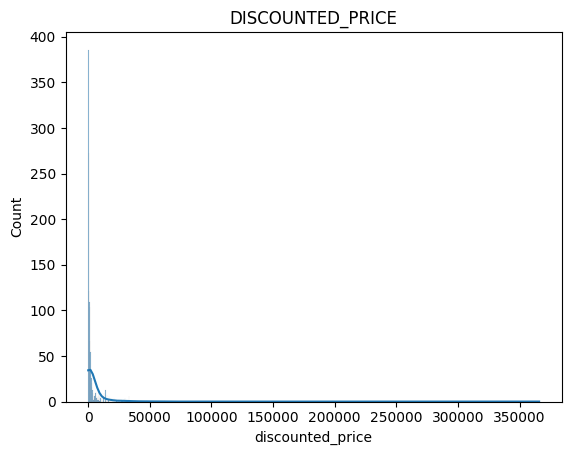

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


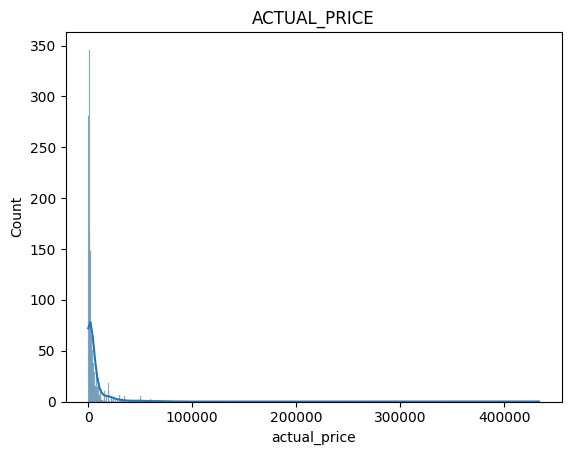

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


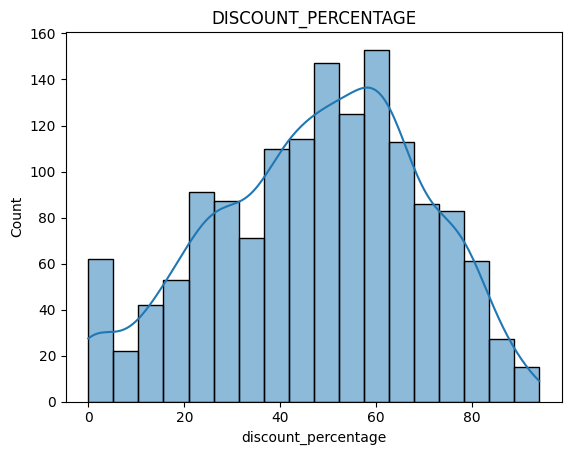

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


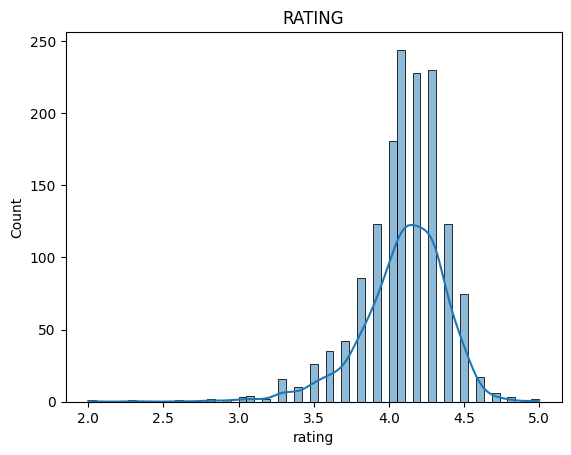

---------------------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


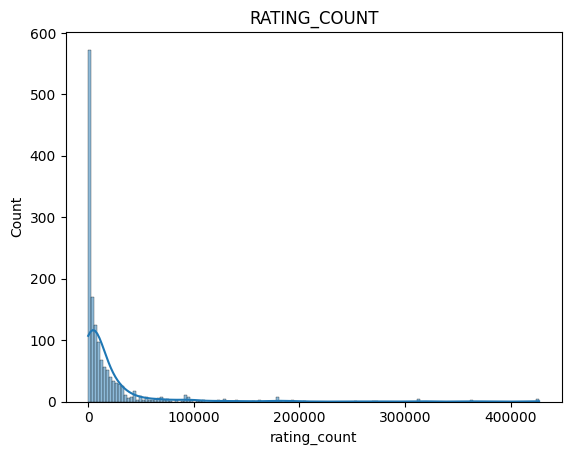

---------------------------------------------------------------------------



In [19]:
for col in nums:
    histplot(df,col)

**Normallik;**
Burda N√ºmerik deƒüi≈ükelerimize baktƒ±ƒüƒ±mƒ±zda indirim y√ºzdesi ve derecelendirme oranƒ±  normal daƒüƒ±lƒ±m g√∂sterirken (√áan Eƒüirisi)  ; indirimli fiyat ,ger√ßek fiyat ve derecelendirme sayƒ±sƒ± normal olmayan bir daƒüƒ±lƒ±m (Sola √áarpƒ±k) olu≈üturmu≈ü.Sola √ßarpƒ±k histogramlar genelde negatif √ßarpƒ±klƒ±k deƒüerine ve sol tarafta uzun bir kuyruƒüa sahiptir.
**************************************
**Normality;**
Here, when we look at our numerical variables, while the discount percentage and rating rate show a normal distribution (Bell Curve); the discount price, real price and rating number have an abnormal distribution (Skewed to the Left). Left-skewed histograms generally have a negative skew value and a long tail on the left.

In [20]:
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...               399   
1  Computers&Accessories|Accessories&Peripherals|...               199   
2  Computers&Accessories|Accessories&Peripherals|...               199   
3  Computers&Accessories|Accessories&Peripherals|...               329   
4  Computers&Accessories|Accessories&Peripherals|...               154   

   actual_price  discount_percentage  rating  rating_count  \
0          1099                   64     4.2         24269   
1           349                   43     4.0         43994   
2          1899                   90     3.9          7928   
3           699                   53     4.2         94363   
4           399                   61     4.2         16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

**√ñnemli Not**:Kategorik Deƒüi≈ükenler √ßok fazla sayƒ±da benzersiz deƒüerlerden olu≈ütuƒüu i√ßin g√∂rselle≈ütirmedim.

In [21]:
cats

['product_id',
 'product_name',
 'category',
 'about_product',
 'user_id',
 'user_name',
 'review_id',
 'review_title',
 'review_content',
 'img_link',
 'product_link']

# N√ºmerik Deƒüi≈ükenlerin BoxPlot Grafikleri
**(Aykƒ±rƒ± Deƒüerleri G√∂rebiliriz)**
# BoxPlot Plots of Numerical Variables
**(We Can See Outliers)**

In [22]:
def boxplot(dataframe,colname):
    sns.boxplot(data=dataframe,x=colname,palette='Set1')
    plt.title(col.upper())
    plt.tight_layout()
    plt.show()
    

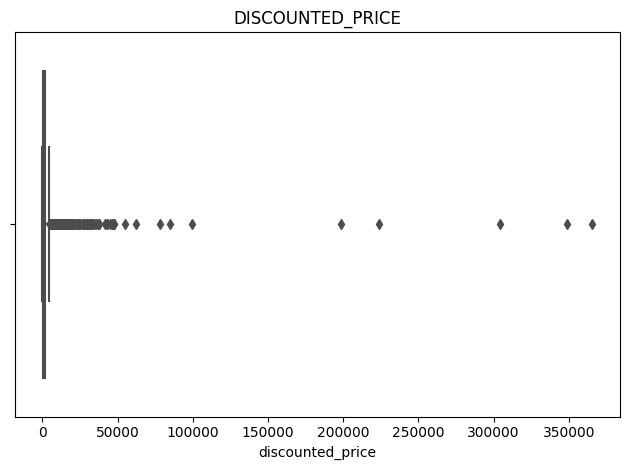

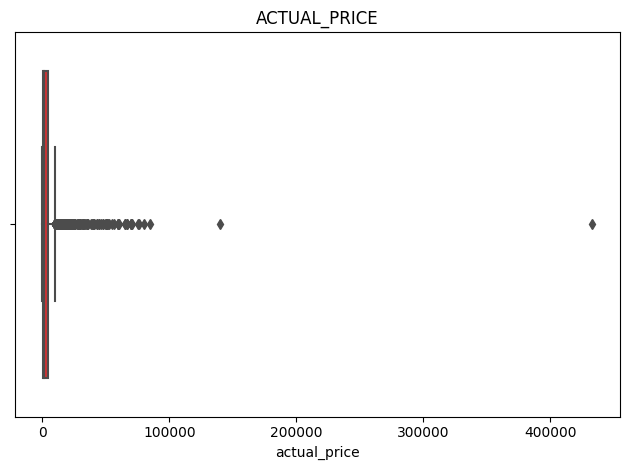

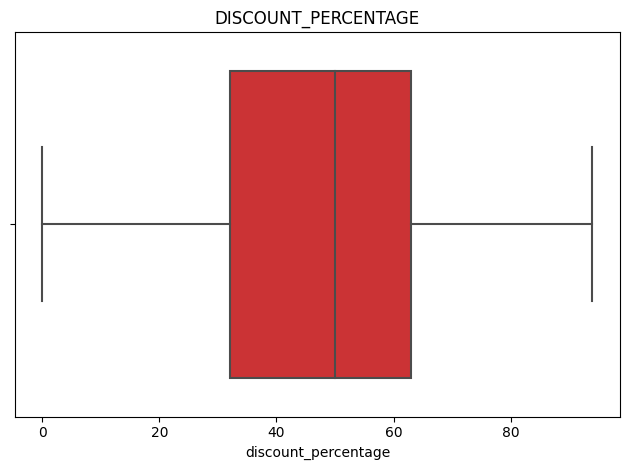

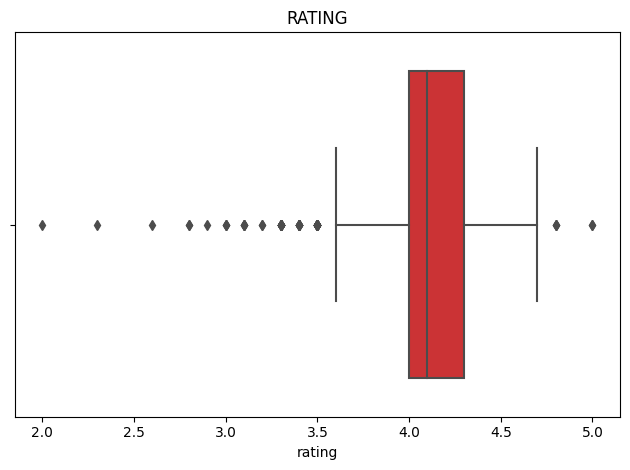

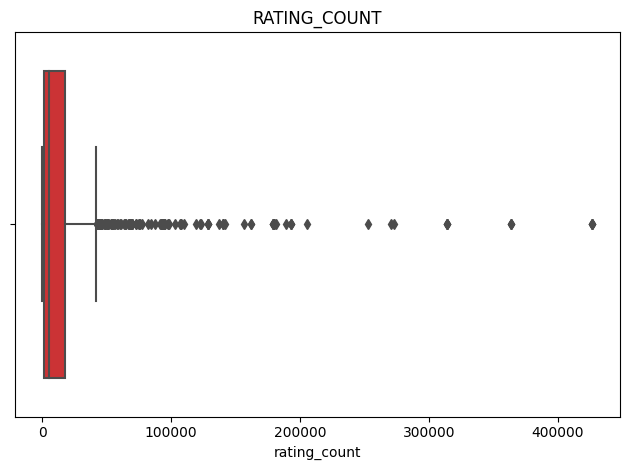

In [23]:
for col in nums:
    boxplot(df,col)

***Aykƒ±rƒ± Deƒüer** :ƒ∞ndirim y√ºzdesi deƒüi≈ükeni dƒ±≈üƒ±ndaki deƒüi≈ükenlerde (indirimli fiyat ,ger√ßek fiyat,dereceelendiren ki≈üi sayƒ±sƒ±,derecelendirme puanlarƒ±) aykƒ±rƒ± deƒüerler olduƒüu saptanmƒ±≈ütƒ±r.

**Outlier**: It was determined that there were outliers in variables other than the discount percentage variable (discounted price, actual price, number of raters, rating scores).

# Aykƒ±rƒ± Deƒüerleri IQR Y√∂ntemi ƒ∞le Baskƒ±lama

In [24]:
def baskƒ±hesabƒ±(dataframe,colname,q1=0.25,q3=0.75):
    quantile1 = dataframe[colname].quantile(q1)
    quantile3 = dataframe[colname].quantile(q3)
    interquantile_range = quantile3-quantile1
    up_limit = quantile3+1.5*interquantile_range
    low_limit = quantile1-1.5*interquantile_range
    return low_limit,up_limit


**√áeyreka√ßƒ±klƒ±k Hesabƒ±**
**(Quarterly Opening Calculation)**


In [25]:
baskƒ±hesabƒ±(df,nums,q1=0.25,q3=0.75)

(discounted_price       -2310.625
 actual_price           -4685.625
 discount_percentage      -14.500
 rating                     3.550
 rating_count          -23034.625
 dtype: float64,
 discounted_price        4728.375
 actual_price            9959.375
 discount_percentage      109.500
 rating                     4.750
 rating_count           41568.375
 dtype: float64)

**Aykƒ±rƒ± Deƒüerleri Baskƒ±lama**

In [26]:
def replace_with_thresholds(df, col_name):
    # Alt ve √ºst sƒ±nƒ±rlarƒ± bul
    low_limit, up_limit = baskƒ±hesabƒ±(df, col_name)
    
    # Aykƒ±rƒ± deƒüerleri alt ve √ºst sƒ±nƒ±rlara √ßek
    df.loc[df[col_name] < low_limit, col_name] = low_limit
    df.loc[df[col_name] > up_limit, col_name] = up_limit

**Aykƒ±rƒ± Deƒüerleri Olan Deƒüi≈ükenlerin Baskƒ±lanmasƒ±**

In [27]:
replace_with_thresholds(df,'discounted_price')
replace_with_thresholds(df,'actual_price')
replace_with_thresholds(df,'rating')
replace_with_thresholds(df,'rating_count')


/tmp/ipykernel_17/3499952263.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2310.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col_name] < low_limit, col_name] = low_limit
/tmp/ipykernel_17/3499952263.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4685.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col_name] < low_limit, col_name] = low_limit
/tmp/ipykernel_17/3499952263.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-23034.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col_name] < low_limit, col_name] = low_limit


**N√ºmerik Deƒüi≈ükenleri BoxPlot Grafikleriyle Aykƒ±rƒ± Deƒüerleri Tekrar Kontrol Ediyoruz.**

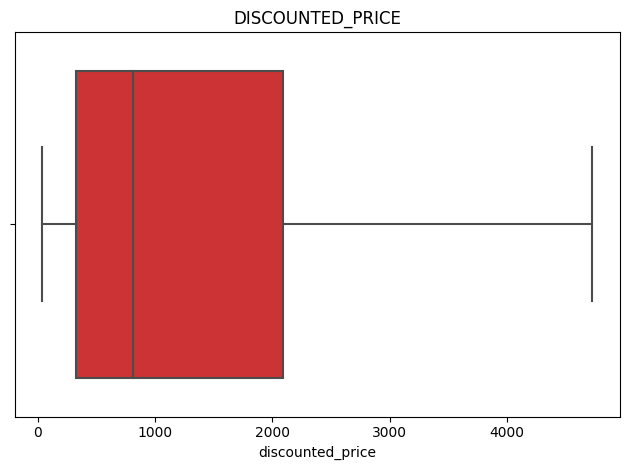

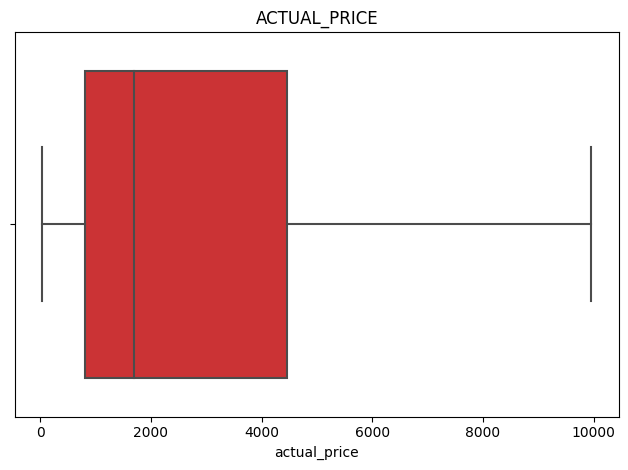

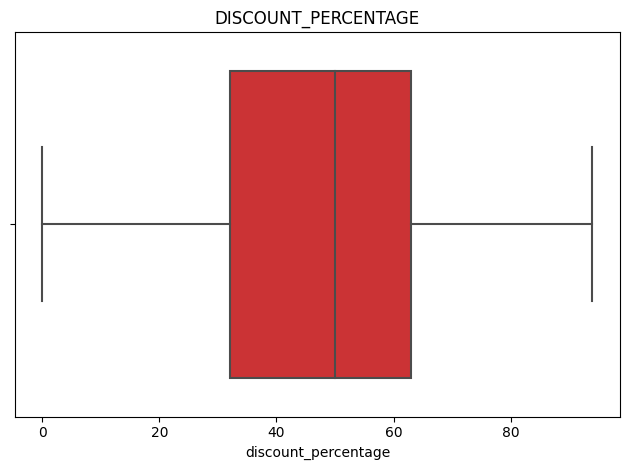

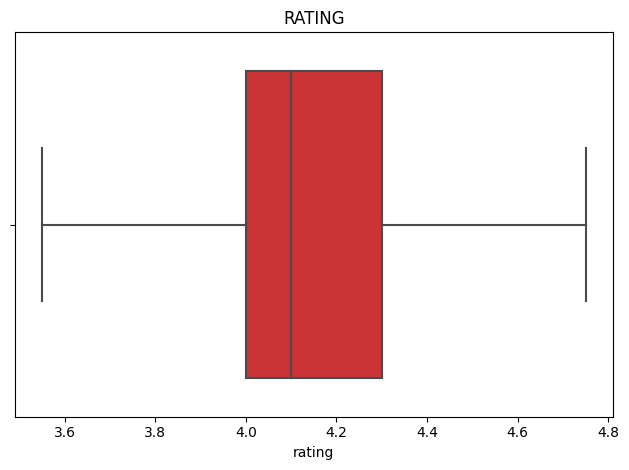

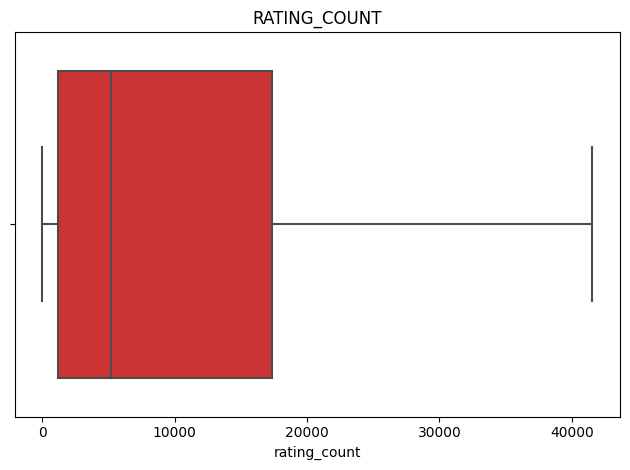

In [28]:
for col in nums:
    boxplot(df,col)

**Aykƒ±rƒ± deƒüer n√ºmerik deƒüi≈ükenlerimizde bulunmuyor.**

# N√ºmerik Deƒüi≈ükenler ƒ∞√ßin Analizler

**KDE PLOT**

/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


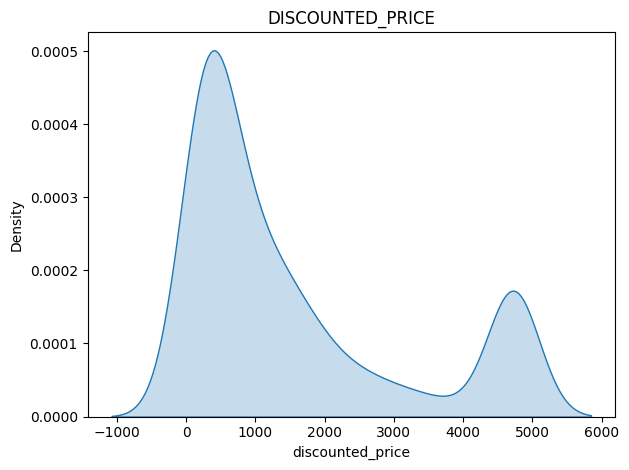

-----------------------------------------------------------



/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


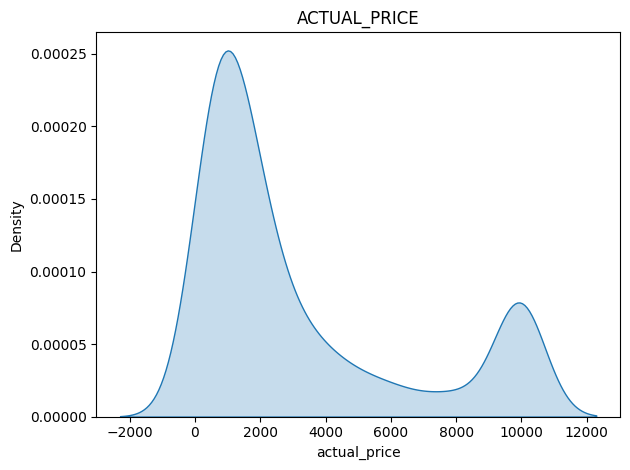

-----------------------------------------------------------



/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


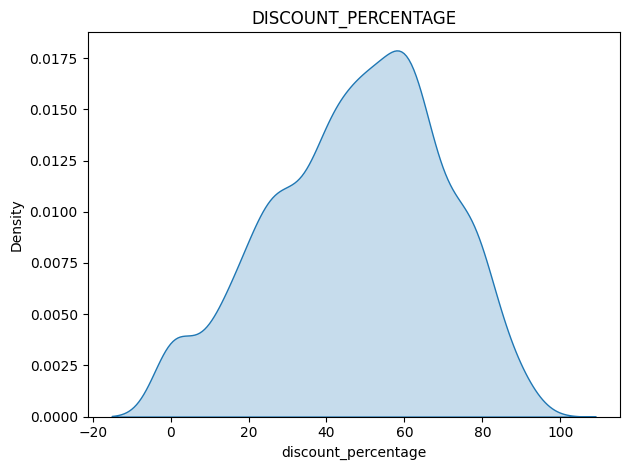

-----------------------------------------------------------



/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


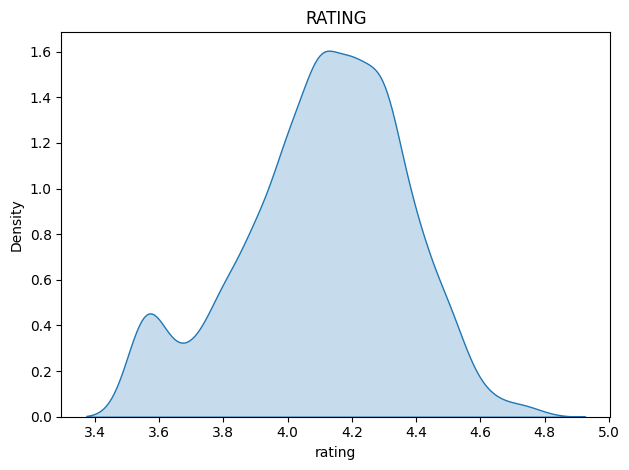

-----------------------------------------------------------



/tmp/ipykernel_17/746466065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/tmp/ipykernel_17/746466065.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


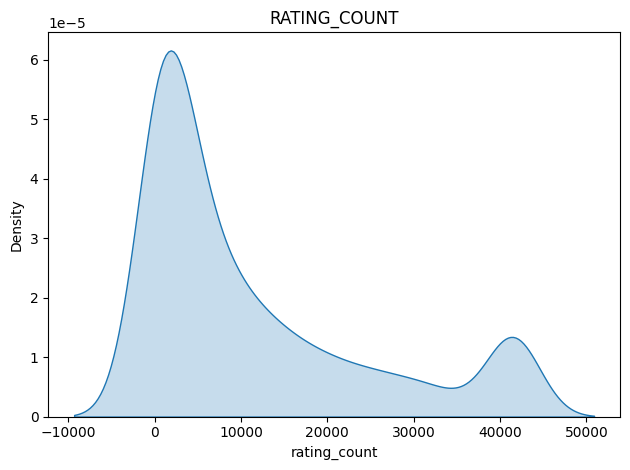

-----------------------------------------------------------



In [29]:
for col in nums:
    sns.kdeplot(data=df,x=col,shade=True,palette='Set1')
    plt.title(col.upper())
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------",end="\n\n")

**A√ßƒ±klama**
ƒ∞ndirimli fiyat deƒüi≈ükeni ile ger√ßek fiyat deƒüi≈ükeni birbirine benzer daƒüƒ±lƒ±mlar g√∂stermi≈üler.indirim y√ºzdesi belli yerde √ßan eƒüirisi kƒ±vanƒ±ma gelmi≈ü buda verilerin normal dƒüƒ±ldƒ±ƒüƒ±na bir i≈üaret diyebiliriz √ßoƒüu √ºr√ºn derecelendirilmemi≈ü yani oy kullanmayan insan sayƒ±sƒ± fazla bununla beraber derecelendirme  sayƒ±larƒ± da normale yakƒ±n deƒüerler almƒ±≈ü.


The discounted price variable and the real price variable showed similar distributions. The discount percentage has become like a bell curve at a certain point, which is an indication that the data is normally distributed. Most products are not rated, meaning the number of people who did not vote is high, and the rating numbers are also close to normal.**


**ECDF PLOT**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


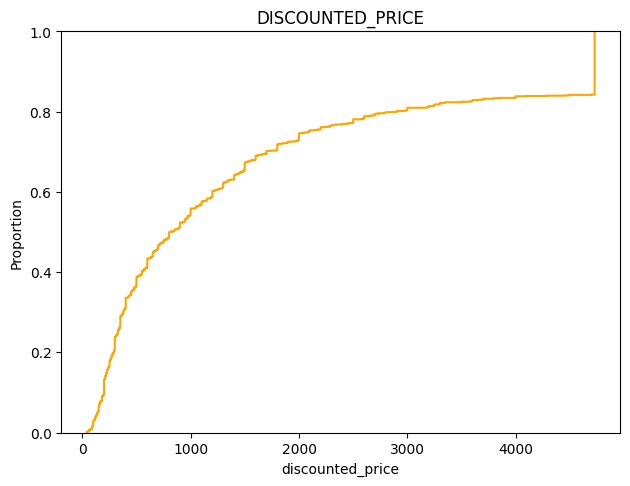

------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


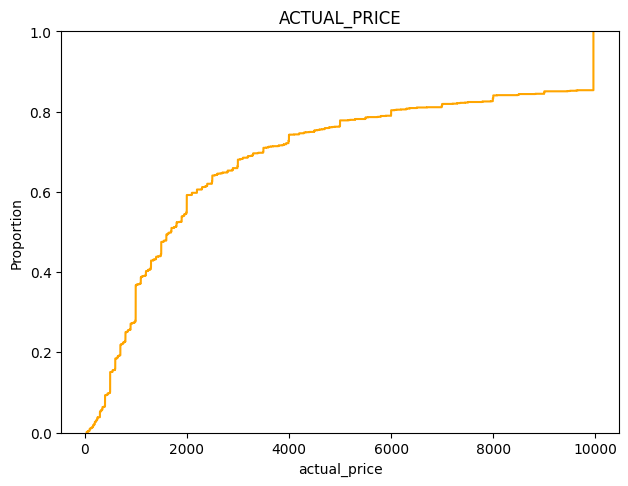

------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


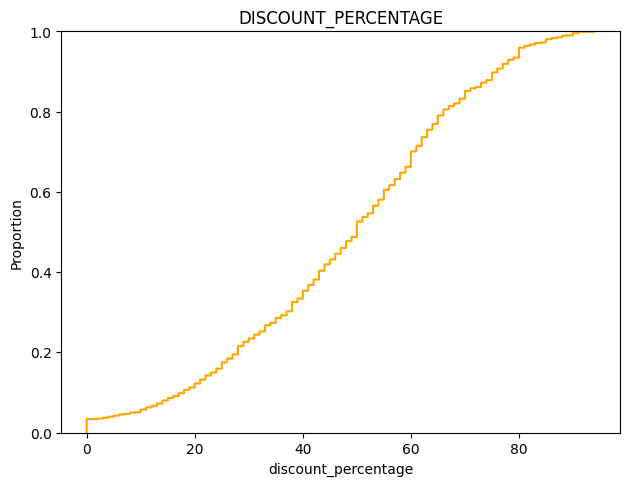

------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


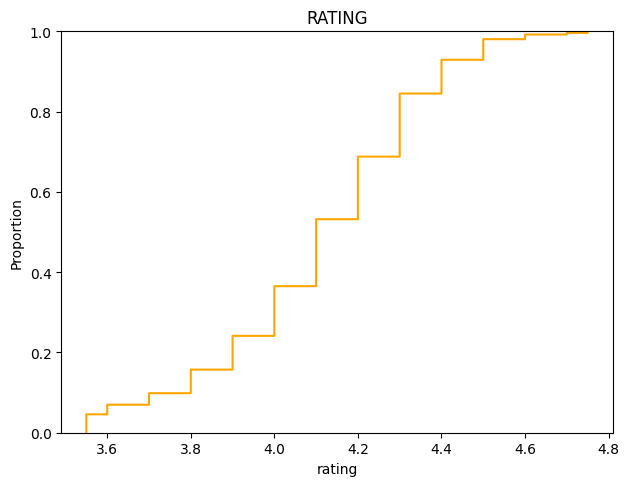

------------------------------------------------



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


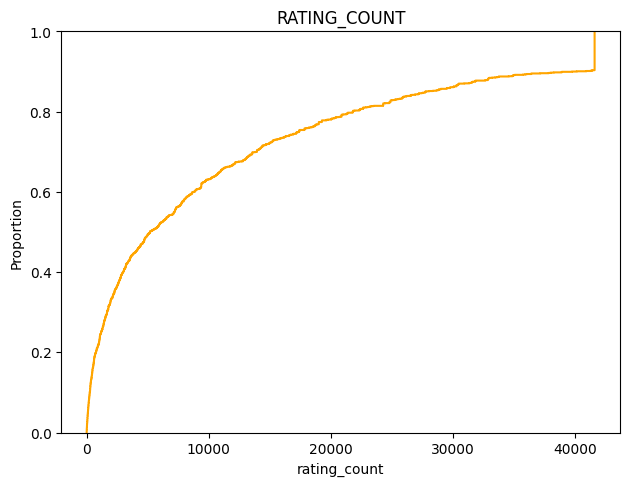

------------------------------------------------



In [30]:
for col in nums:
    sns.ecdfplot(data=df,x=col,color='orange')
    plt.tight_layout()
    plt.title(col.upper())
    plt.show()
    print("------------------------------------------------",end="\n\n")

# KE≈ûƒ∞FSEL VERƒ∞ ANALƒ∞Zƒ∞ (EDA)

# ƒ∞ndirimli Fiyat vs Ger√ßek Fiyat

**indirimli fiyat (discounted_price) ve ger√ßek fiyat (actual_price) Deƒüi≈ükenleri**

**Fiyat Daƒüƒ±lƒ±mƒ±**: Her iki fiyatƒ±n daƒüƒ±lƒ±mƒ±nƒ± inceliyoruz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


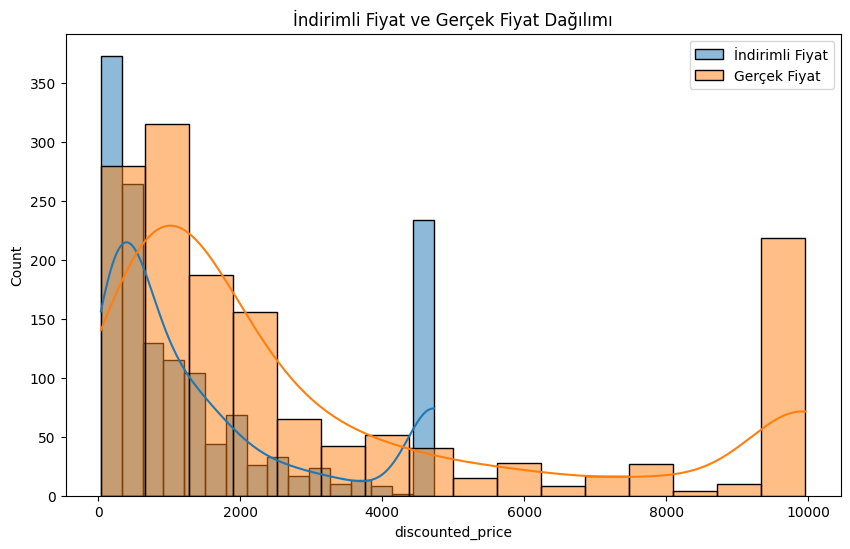

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], kde=True, label='ƒ∞ndirimli Fiyat')
sns.histplot(df['actual_price'], kde=True, label='Ger√ßek Fiyat')
plt.title('ƒ∞ndirimli Fiyat ve Ger√ßek Fiyat Daƒüƒ±lƒ±mƒ±')
plt.legend()
plt.show()


**indirimli fiyat ve ger√ßek fiyat arasƒ±ndaki farklar**


Differences between discounted price and real price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


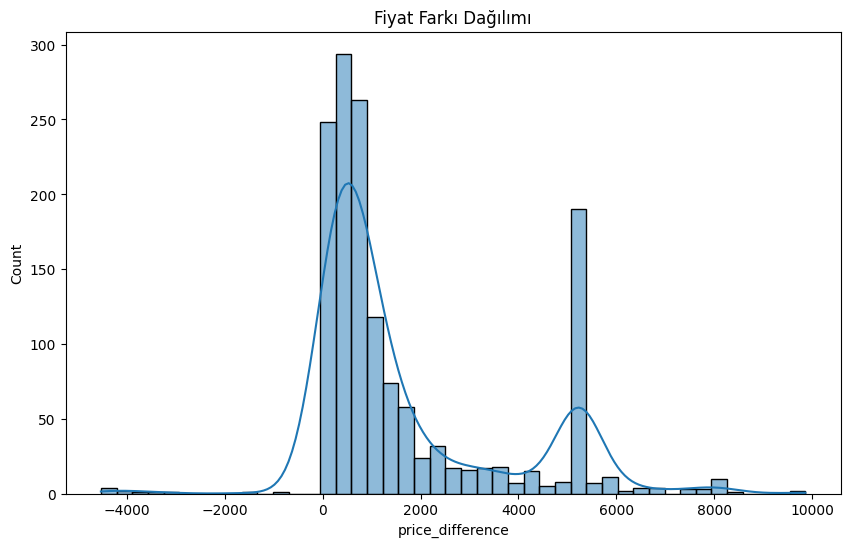

In [32]:
df['price_difference'] = df['actual_price'] - df['discounted_price']
plt.figure(figsize=(10, 6))
sns.histplot(df['price_difference'], kde=True)
plt.title('Fiyat Farkƒ± Daƒüƒ±lƒ±mƒ±')
plt.show()


**Burdaki farklar aslƒ±nda indirim oranƒ±nƒ± tesmil ediyor dieyebiliriz ger√ßek fiyatƒ± y√ºksek olup y√ºksek indirim uygulanan √ºr√ºnler olabileceƒüi gibi normalden fazla indirim de e uygulanmasƒ± bir √ºr√ºne y√ºksek tutarda fiyat farkƒ±na sebebiyet verebilir.Hatta ger√ßek fiyat indirimli fiyattan daha d√º≈ü√ºk olduƒüu durumlarda olmu≈ü**


We can say that the differences here actually represent the discount rate. There may be products with high real prices and a high discount, but applying a higher than normal discount may also cause a high price difference for a product.

# Derecelendirme Sayƒ±sƒ± vs Derecelendirme Puanƒ±

**Alƒ±nan Derecelendirme Puanlarƒ± ƒ∞le Derecelendirme Sayƒ±larƒ± Arasƒ±ndaki ƒ∞li≈üki**


Relationship Between Rating Points Received and Rating Numbers

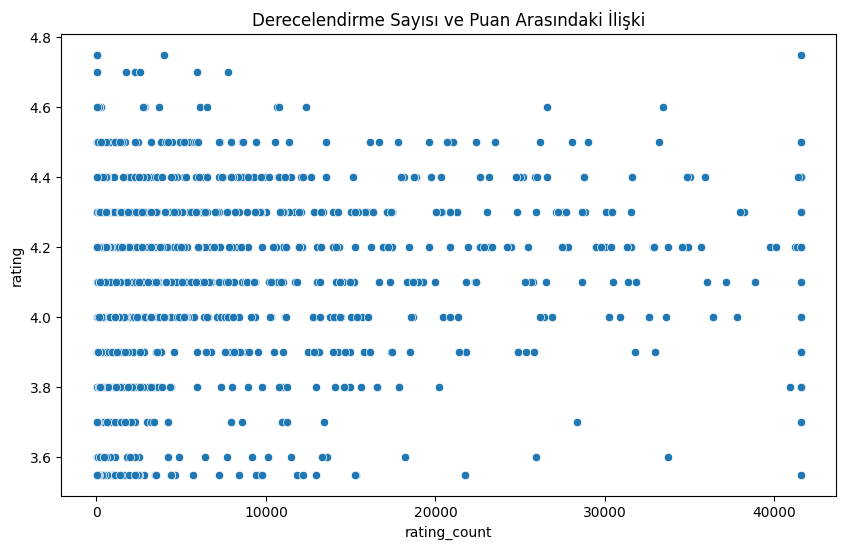

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_count', y='rating', data=df)
plt.title('Derecelendirme Sayƒ±sƒ± ve Puan Arasƒ±ndaki ƒ∞li≈üki')
plt.show()


**Fazla sayƒ±da deƒüerlendirilen √ºr√ºn olmadƒ±ƒüƒ± spesifik bir yorum yapamamakla beraber  grafik  4.2 derecelendirme puanƒ±nda yoƒüunla≈ümƒ±≈ü durumda**

**Korelasyonlarƒ±**

Derecelendirme Sayƒ±sƒ± ve Puan Arasƒ±ndaki Korelasyon: 0.16
Korelasyonun Karesi (R¬≤): 0.02


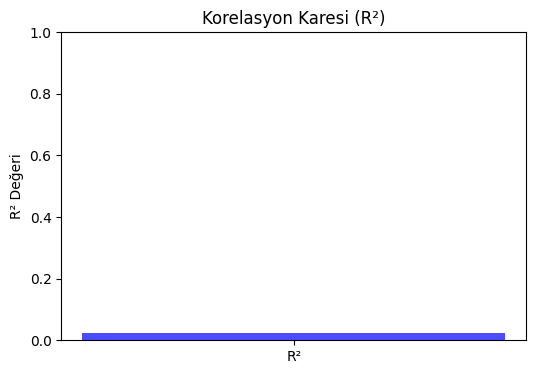

In [34]:
# Korelasyon ve karesi (R^2)
correlation = df['rating_count'].corr(df['rating'])
r_squared = correlation**2
print(f"Derecelendirme Sayƒ±sƒ± ve Puan Arasƒ±ndaki Korelasyon: {correlation:.2f}")
print(f"Korelasyonun Karesi (R¬≤): {r_squared:.2f}")

# R¬≤'yi bar grafiƒüi olarak g√∂rselle≈ütirme
plt.figure(figsize=(6, 4))
plt.bar(['R¬≤'], [r_squared], color='blue', alpha=0.7)
plt.title('Korelasyon Karesi (R¬≤)')
plt.ylim(0, 1)
plt.ylabel('R¬≤ Deƒüeri')
plt.show()

**Derecelendiren ki≈üi sayƒ±sƒ± arttƒ±kca veya azaldƒ±kca derecelendirme puanƒ±nda belirgin bir deƒüi≈üiklik olmuyor.**


There is no significant change in the rating rate as the number of people rating increases or decreases.

# ƒ∞ndirim Y√ºzdesi vs Derecelendirme Puanƒ±

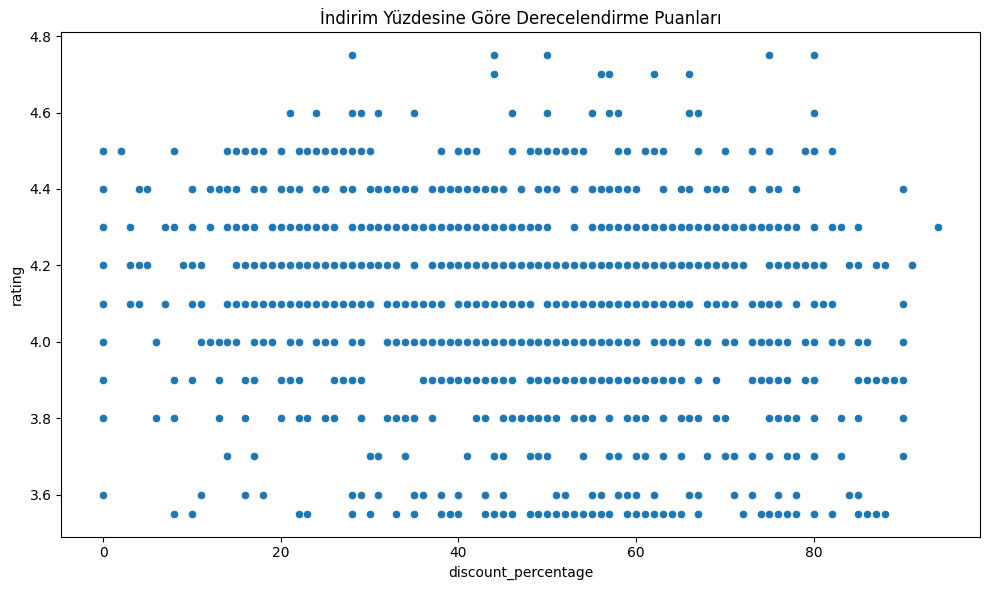

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='discount_percentage',y='rating',data=df)
plt.title("ƒ∞ndirim Y√ºzdesine G√∂re Derecelendirme Puanlarƒ±")
plt.tight_layout()
plt.show()

In [36]:
correlation = df['discount_percentage'].corr(df['rating'])
print(f"Korelasyon Katsayƒ±sƒ±:{correlation}")

Korelasyon Katsayƒ±sƒ±:-0.15521912565961296



**Olduk√ßa k√∂t√º bir korelasyon sonucu yani derecelendirme puanƒ± ile indirimin doƒürusal bir baƒüƒ± ili≈ükisi yoktur diyebiliriz.**



----------------------



**It is a very bad correlation result, that is, we can say that there is no linear relationship between the rating score and the discount.**


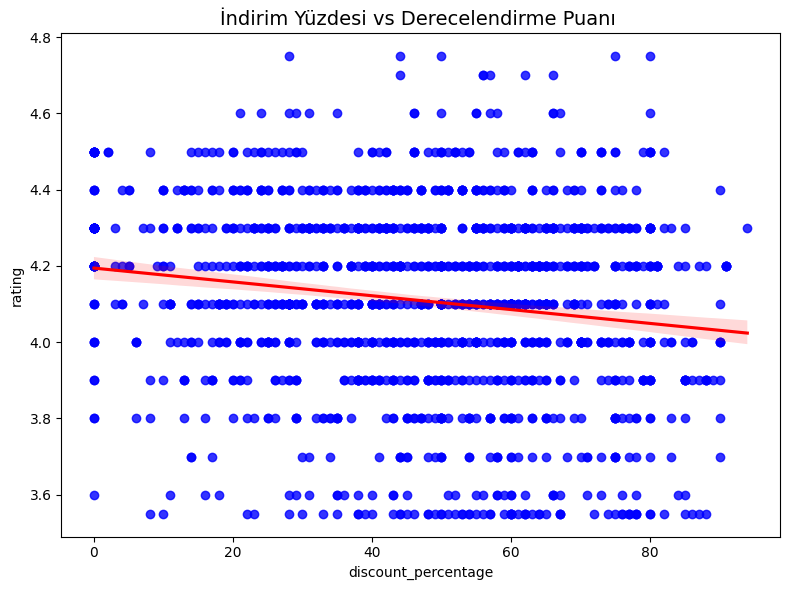

In [37]:
correlation = df['discount_percentage'].corr(df['rating'])

# Daƒüƒ±lƒ±m grafiƒüi ve regresyon √ßizgisi
plt.figure(figsize=(8, 6))
sns.regplot(x='discount_percentage', y='rating', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f"ƒ∞ndirim Y√ºzdesi vs Derecelendirme Puanƒ± ", fontsize=14)
plt.tight_layout()
plt.show()

**Daƒüƒ±lƒ±m Grafiƒüi**
**Regresyon √áizgisi**:  doƒürusal regresyon √ßizgisi kƒ±rmƒ±zƒ± renkte
**Korelasyon Bilgisi**: √ºst kƒ±smƒ±na korelasyon katsayƒ±sƒ± 

# ƒ∞ndirim Y√ºzedesi vs Derecelendiren Ki≈üi Sayƒ±sƒ±

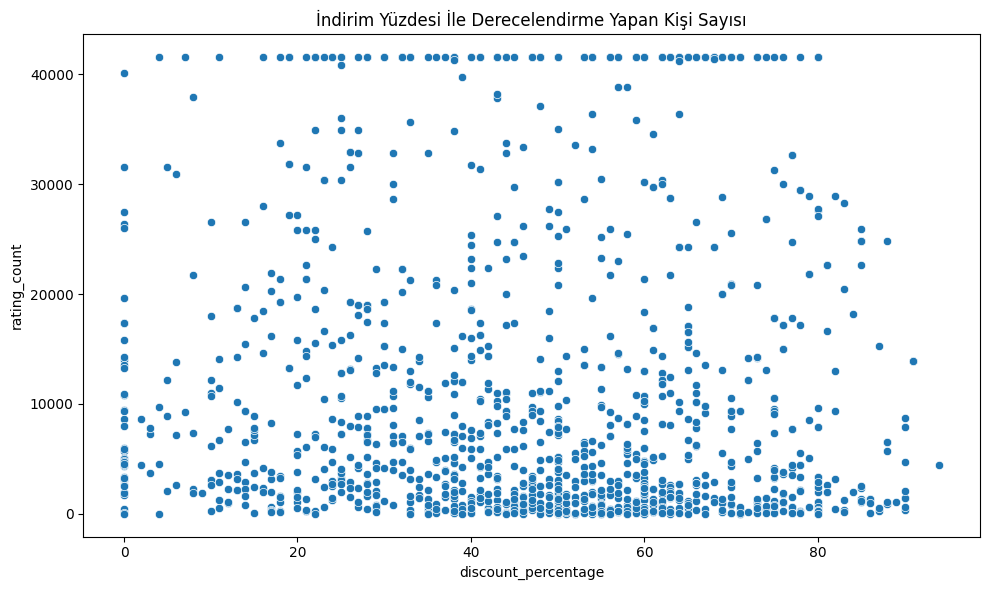

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='discount_percentage',y='rating_count',data=df)
plt.title(f"ƒ∞ndirim Y√ºzdesi ƒ∞le Derecelendirme Yapan Ki≈üi Sayƒ±sƒ±")
plt.tight_layout()
plt.show()

**Daƒüƒ±lƒ±mlara bakƒ±tƒ±ƒüƒ±mƒ±zda iki  daƒüƒ±lƒ±mƒ±n birbirine benzerlik g√∂sterdiƒüini s√∂yleyemeyiz ve genellikle  y√ºzde 40 ile 60 arasƒ± indirim yapƒ±lan √ºr√ºnlerin  derecelendirilme sayƒ±larƒ±  fazla  olduƒüunu s√∂yleyebiliriz**.

--------------------------------

**When we look at the distributions, we cannot say that the two distributions are similar to each other and we can say that the number of ratings is generally higher for products with a discount of 40 to 60 percent**.


In [39]:
correlation =  df['discount_percentage'].corr(df['rating_count'])
print(f"Korelasyon Sayƒ±sƒ±:{correlation}")

Korelasyon Sayƒ±sƒ±:-0.03362180005539111


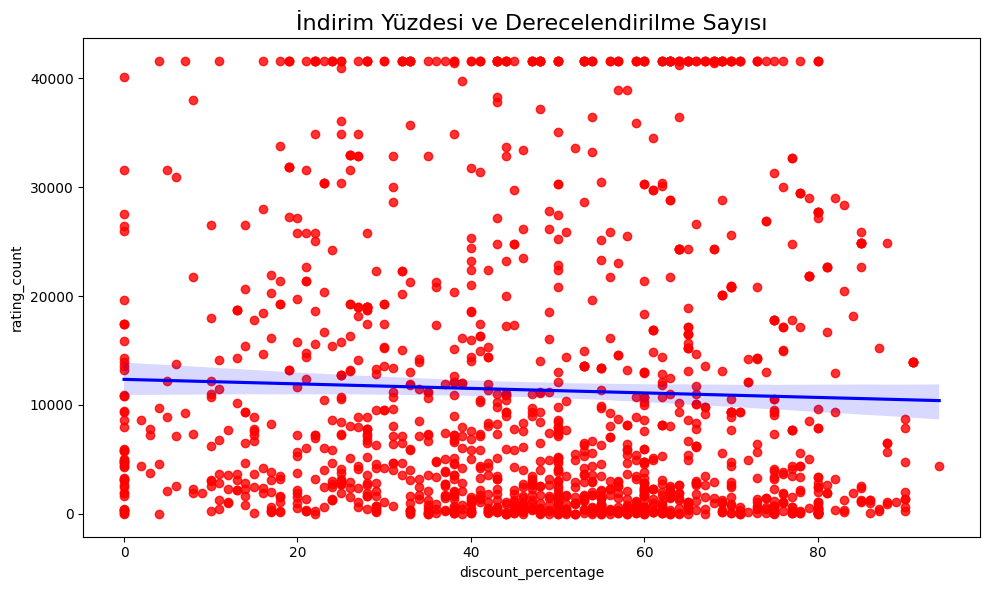

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(x='discount_percentage',y='rating_count',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.title(f"ƒ∞ndirim Y√ºzdesi ve Derecelendirilme Sayƒ±sƒ±",fontsize=16)
plt.tight_layout()
plt.show()

**ƒ∞ndirim y√ºzdesi ile derecelendirme yapan ki≈üi  sayƒ±sƒ±  daƒüƒ±lƒ±mlarƒ± arasƒ±nda bir benzerik olmadƒ±ƒüƒ± g√∂r√ºn√ºyor ve  bununla beraber korelasyon sonucununda olduk√ßa d√º≈ü√ºk √ßƒ±kmƒ±≈ütƒ±r.Daƒüƒ±lƒ±m grafiƒüi ve Regresyon √áizgisi √ºstte yer  almƒ±≈ütƒ±r**.

----------------------------

**There seems to be no similarity between the distribution of the discount percentage and the number of people who rated, and the correlation result is also quite low. The distribution graph and the Regression Line are above**.

# ƒ∞ndirimli Fiyat vs Derecelendirme Puanƒ±

In [41]:
correlation = df['discounted_price'].corr(df['rating'])
print(f"Korelasyon Sayƒ±sƒ±:{correlation}")

Korelasyon Sayƒ±sƒ±:0.08994307831225262


<function matplotlib.pyplot.show(close=None, block=None)>

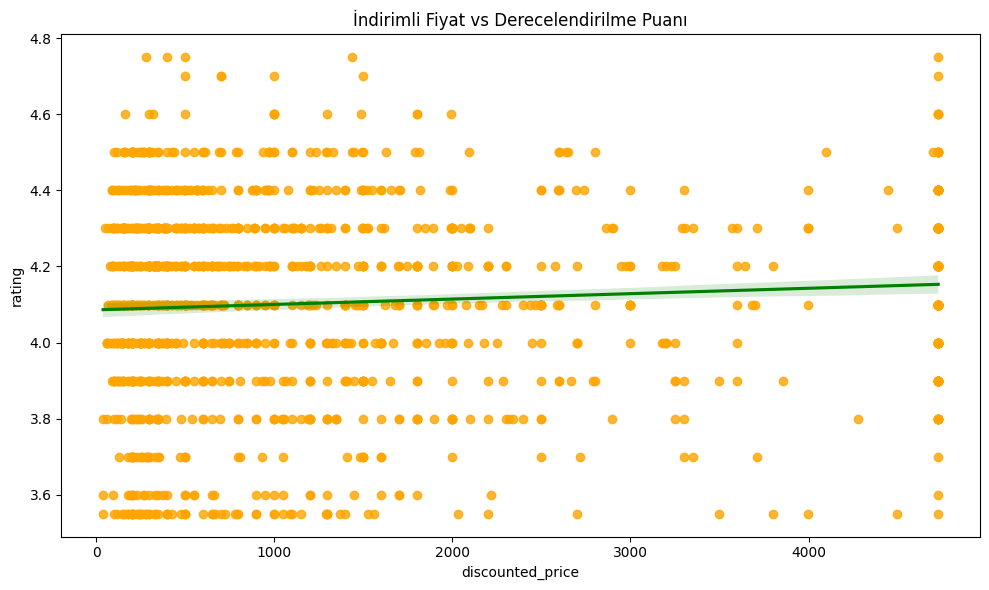

In [42]:
plt.figure(figsize=(10,6))
sns.regplot(x='discounted_price',y='rating',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})
plt.title(f"ƒ∞ndirimli Fiyat vs Derecelendirilme Puanƒ±")
plt.tight_layout()
plt.show

**ƒ∞ndirim Tutarƒ± ve Derecelendirme Puanƒ± deƒüi≈ükenlerinin korelasyonlarƒ±na,regresyon √ßizgisine ve daƒüƒ±lƒ±m grafiƒüine baktƒ±ƒüƒ±mƒ±zda daƒüƒ±lƒ±mlarda herhangi bir benzerlik g√∂r√ºlmemekle  beraber korelasyon sayƒ±sƒ± da  √ßok d√º≈ü√ºk gelmi≈ütir**

-------------------------------------------

**When we look at the correlations, regression line and distribution graph of the Discount Amount and Rating Score variables, there is no similarity in the distributions and the correlation number is also very low**

# N√ºmerik Deƒüi≈ükenlerin  Korelasyonlarƒ±

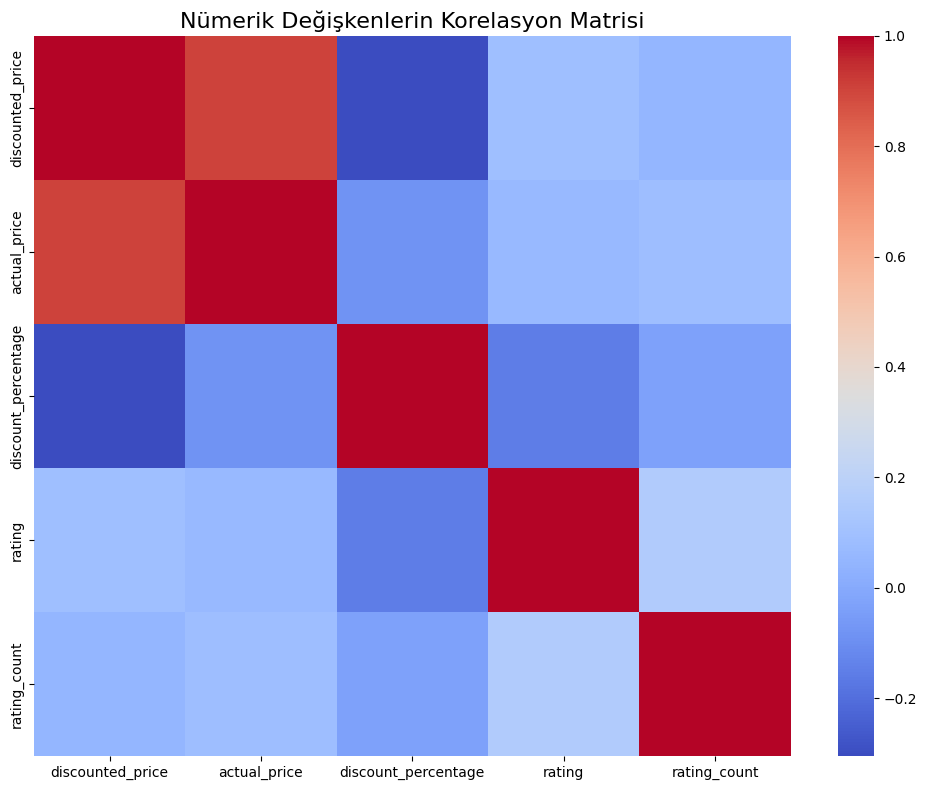

In [43]:
correlation_matrix =df[nums].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,cmap='coolwarm',fmt=".2f")
plt.title("N√ºmerik Deƒüi≈ükenlerin Korelasyon Matrisi",fontsize=16)
plt.tight_layout()
plt.show()

**Korelasyon Matrisine baktƒ±ƒüƒ±mƒ±zda indirimli fiyat ve ger√ßek fiyat deƒüi≈ükeni arasƒ±nda pozitif bir ili≈üki olduƒüunu g√∂r√ºyoruz bunun dƒ±≈üƒ±nda pozitif bir ili≈üki durumu yoktur**.


--------------------------------------------

**When we look at the Correlation Matrix, we see that there is a positive relationship between the discounted price and the real price variable, but there is no other positive relationship**.

In [44]:
df[cats]

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category  \
0     Computers&Accessories|Accessories&Peripherals|...   
1     Computers&Accessories|Accessories&Peripherals|...   
2     Computers&Accessories|Accessories&Peripherals|...   
3     Computers&Accessories|Accessories&Peripherals|...   
4     Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification √¢‚Ç¨‚Äú 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1     ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2     Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3     Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4     rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   
...                                                 ...   
1460  Prabha ds,Raghuram bk,Real Deal,Amazon Custome...   
1461  Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...   
1462  Nehal Desai,Danish Parwez,Amazon Customer,Amaz...   
1463  Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...   
1464  Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...   

                                              review_id  \
0     R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1     RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2     R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3     R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4     R1BP4L2

# Veri Kontrol

# Data Control

**Eksik Veya Tekrarlayan Veri Yok**.

-----------------------------------------------

**No Missing or Duplicate Data**.

In [45]:
# Eksik verileri kontrol et
print(df.isnull().sum())

# Tekrarlayan verileri kontrol et
print(df.duplicated().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
price_difference       0
dtype: int64
0


In [46]:
df1 = df.copy

# Target Encoding

**groupby ile Ortalama Hesaplama: category deƒüi≈ükenindeki her bir kategori i√ßin hedef deƒüi≈ükenin (rating) ortalama deƒüerini hesapladƒ±k.
map ile Kategorilere Kar≈üƒ±lƒ±k Gelen Deƒüerleri Atama: map fonksiyonu, category s√ºtunundaki her deƒüere kar≈üƒ±lƒ±k gelen ortalama deƒüeri atar. Bu i≈üemlerle Category deƒüi≈ükenini Derecelendirme puanlarƒ± ortalamalarƒ±na g√∂re n√ºmerik hale getirdik**.


-------------------------------------------

**Calculating Average with groupby: We calculated the average value of the target variable (rating) for each category in the category variable. Assigning Values ‚Äã‚ÄãCorresponding to Categories with map: The map function assigns the average value corresponding to each value in the category column. With these operations, we made the Category variable numeric according to the average rating scores**.

In [47]:
category_mean=df.groupby('category')['rating'].mean()
df['category_encoded'] = df['category'].map(category_mean)

In [48]:
df[['category','category_encoded']]

category  category_encoded
0     Computers&Accessories|Accessories&Peripherals|...          4.154545
1     Computers&Accessories|Accessories&Peripherals|...          4.154545
2     Computers&Accessories|Accessories&Peripherals|...          4.154545
3     Computers&Accessories|Accessories&Peripherals|...          4.154545
4     Computers&Accessories|Accessories&Peripherals|...          4.154545
...                                                 ...               ...
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...          3.977273
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...          3.960000
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...          3.700000
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...          4.100000
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...          4.100000

[1462 rows x 2 columns]

**Burda her kategorinin ortalamalarƒ±nƒ± yuvarlamamamƒ±n sebebi fazla sayƒ±da benzersiz deƒüer (nunique) elde edip b√∂ylelikle ilerleyen s√ºre√ßte modeli Overfitting riskine kar≈üƒ± korumu≈ü oluyorum bu ondalƒ±k sayƒ±larƒ± round() fonksiyonuyla halledebilirdim kategorilerin ayƒ±rt edilmesi a√ßƒ±sƒ±ndan da √∂nemli**.

-----------------------------------------------
**The reason I do not round the averages of each category here is that I obtain a large number of unique values ‚Äã‚Äã(nuniques) and thus protect the model against the risk of overfitting in the future. I could have handled these decimal numbers with the round() function**.

In [49]:
df[['category','category_encoded']].nunique()

category            211
category_encoded     93
dtype: int64

# Feature Engineering (√ñzellik M√ºhendisliƒüi)

**Fiyat Farkƒ± = Ger√ßek Fiyat - ƒ∞ndirimli Fiyat**

**Aƒüƒ±rlƒ±klƒ± Derecelendirme = Derecelendirme Puanƒ± * Derecelendirme Sayƒ±sƒ±**

-------------------------------------------
Price Difference = Actual Price - Discounted Price

Weighted Rating = Rating Point * Number of Ratings



In [50]:
df['price_difference'] = df['actual_price'] - df['discounted_price']
df['weighted_rating'] = df['rating'] * df['rating_count']

In [51]:
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                   64     4.2     24269.000   
1         349.0                   43     4.0     41568.375   
2        1899.0                   90     3.9      7928.000   
3         699.0                   53     4.2     41568.375   
4         399.0                   61     4.2     16905.000   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  price_difference  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...             700.0   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...             150.0   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...            1700.0   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...             370.0   
4  https://www.amazon.in/Portronics-Konnect

**Fiyat Farkƒ± ve Aƒüƒ±rlƒ±klƒ± Derecelendirme  yeni √∂zellik olarak veri setimize eklenerek bu deƒüi≈ükenlerin derecelendirme puan sƒ±nƒ±fƒ±  tahmini √ºzerinde etkisini g√∂receƒüiz**

In [52]:
df[['price_difference','weighted_rating']]

price_difference  weighted_rating
0                700.0       101929.800
1                150.0       166273.500
2               1700.0        30919.200
3                370.0       174587.175
4                245.0        71001.000
...                ...              ...
1460             540.0         4360.000
1461             765.0        16883.800
1462             861.0         1684.800
1463             491.0        32124.000
1464             827.0        30044.100

[1462 rows x 2 columns]

In [53]:
df[['price_difference','weighted_rating']].nunique()

price_difference     576
weighted_rating     1114
dtype: int64

# Hedef Deƒüi≈üken Belirleme

---------------------------------------------------

# Determining Target Variables

Makine √∂ƒürenmesi i√ßin bir hedef deƒüi≈üken (target) belirlemeniz gerekiyor. 
Kategori tahmini: **category (hedef deƒüi≈üken)**


**Rating sƒ±nƒ±flandƒ±rmasƒ±**: Rating deƒüerini sƒ±nƒ±flara b√∂ld√ºk (d√º≈ü√ºk, orta, y√ºksek).

---------------------------------------------

**Low: 0-3 arasƒ±ndaki rating deƒüerleri**
**Medium: 3-4 arasƒ±ndaki rating deƒüerleri**
**High: 4-5 arasƒ±ndaki rating deƒüerleri**

------------------------------------------------

You need to specify a target variable for machine learning.

Category prediction: **category (target variable)**

**Rating classification**: We divided the rating value into classes (low, medium, high).

---------------------------------------------

**Low: Rating values ‚Äã‚Äãbetween 0-3**
**Medium: Rating values ‚Äã‚Äãbetween 3-4**
**High: Rating values ‚Äã‚Äãbetween 4-5**
 


In [54]:
df['rating_class'] = pd.cut(df['rating'],bins=[0,3,4,5],labels=['Low', 'Medium', 'High'])

In [55]:
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                   64     4.2     24269.000   
1         349.0                   43     4.0     41568.375   
2        1899.0                   90     3.9      7928.000   
3         699.0                   53     4.2     41568.375   
4         399.0                   61     4.2     16905.000   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  price_difference  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...             700.0   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...             150.0   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...            1700.0   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...             370.0   
4  https://www.amazon.in/Portronics-Konnect

# MODEL OLU≈ûTURMA

**Model, verilen sayƒ±sal √∂zelliklere ve diƒüer baƒüƒ±msƒ±z deƒüi≈ükenlere dayanarak, her bir √ºr√ºn i√ßin rating deƒüerinin hangi sƒ±nƒ±fa ait olduƒüunu tahmin etmeye √ßalƒ±≈üƒ±r**.

Yani, model rating deƒüerini doƒürudan tahmin etmek yerine, rating deƒüerini sƒ±nƒ±flandƒ±rarak hangi sƒ±nƒ±fta (Low, Medium, High) olduƒüunu tahmin eder. Bu ≈üekilde, model √ßok fazla farklƒ± sayƒ±sal deƒüer yerine sadece √º√ß kategori ile sƒ±nƒ±flandƒ±rma yapar

# CREATING A MODEL

**The model tries to predict which class the rating value belongs to for each product based on the given numerical features and other independent variables**.


That is, instead of directly predicting the rating value, the model predicts which class (Low, Medium, High) the rating value falls into by classifying it. In this way, the model classifies with only three categories instead of many different numerical values

**Baƒüƒ±mlƒ± ve Baƒüƒ±msƒ±z Deƒüi≈ükenlerin Belirlenmesi**

X: Baƒüƒ±msƒ±z deƒüi≈ükenlerdir. Burada nums (yani sayƒ±sal deƒüi≈ükenler) ve price_difference(Fiyat Farkƒ±) ile weighted_rating(Aƒüƒ±rlƒ±klƒ± Derecelendirme)kullanƒ±lƒ±yor.

y: Baƒüƒ±mlƒ± deƒüi≈üken (hedef deƒüi≈üken). Burada, rating_class yani rating'in sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ü hali kullanƒ±lƒ±yor.

-------------------------------------------

X: Independent variables. Here, nums (i.e. numeric variables) and price_difference (Price Difference) and weighted_rating (Weighted Rating) are used.

y: Dependent variable (target variable). Here, rating_class, i.e. the classified version of rating, is used.

In [56]:
X = df[ nums + ['price_difference', 'weighted_rating']]
y = df['rating_class']

**Veri Setini Eƒüitim ve Test Olarak Ayƒ±rma**

--------------------------------
**Splitting the Dataset into Training and Test**

**Veri seti, %80 eƒüitim ve %20 test olmak √ºzere ikiye ayrƒ±lƒ±yor. train_test_split fonksiyonu, eƒüitim verilerini modelin √∂ƒürenmesi i√ßin, test verilerini ise modelin doƒüruluƒüunu deƒüerlendirmek i√ßin ayƒ±rƒ±r.**


--------------------------------------

**The dataset is divided into two parts: 80% training and 20% testing. The train_test_split function separates the training data for the model to learn and the test data for evaluating the accuracy of the model**.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Olu≈üturma ve Eƒüitme**

----------------------------------------
**Creating and Training a Model**

RandomForestClassifier: Rastgele Orman sƒ±nƒ±flandƒ±rƒ±cƒ± modelini olu≈üturuyoruz. Bu model, bir√ßok karar aƒüacƒ±ndan (decision trees) olu≈üan bir ansambldƒ±r.
model.fit(X_train, y_train): Eƒüitim verisi ile modeli eƒüitiyoruz. Yani, model X_train (baƒüƒ±msƒ±z deƒüi≈ükenler) ve y_train (sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ü rating) ile √∂ƒürenme yapacak.


-------------------------------------------
RandomForestClassifier: We are creating a Random Forest classifier model. This model is an assembly of many decision trees.

model.fit(X_train, y_train): We are training the model with training data. That is, the model will learn with X_train (independent variables) and y_train (classified rating).


In [58]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

**Modelin Doƒüruluƒüunu Hesaplama**

----------------------------
**Calculating Model Accuracy**

In [59]:
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 1.0


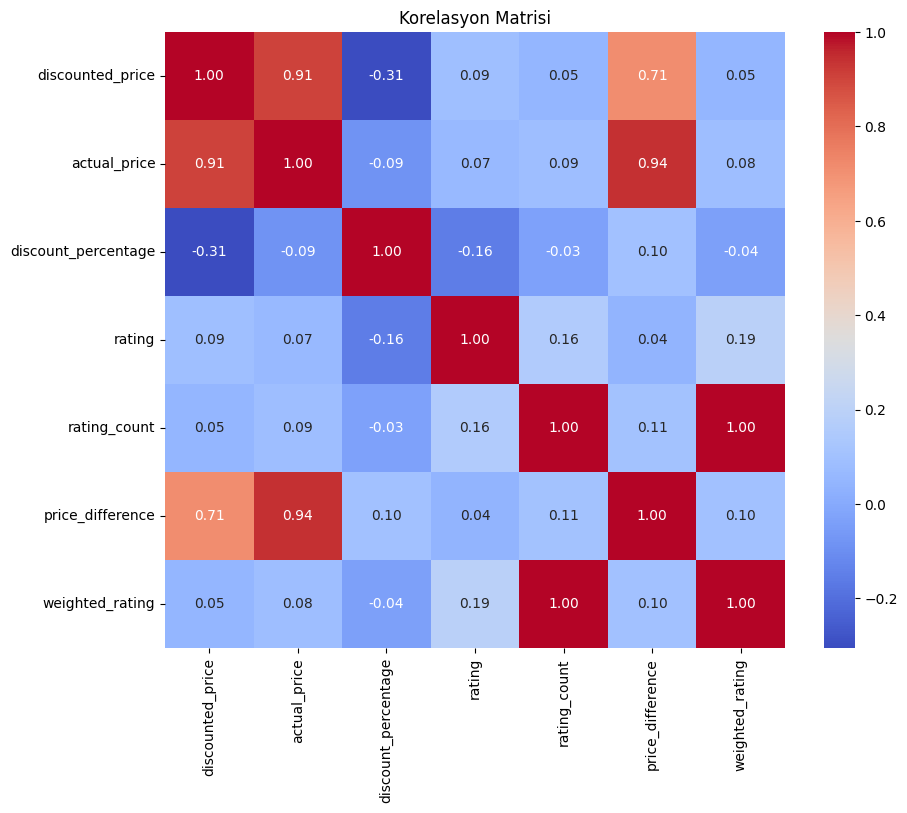

In [60]:
# Korelasyon matrisi
correlation_matrix = df[nums + ['price_difference', 'weighted_rating']].corr()

# Isƒ± haritasƒ±
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

# √áapraz doƒürulama (cross-validation)

**√áapraz doƒürulama (cross-validation), modelin doƒüruluƒüunu daha g√ºvenilir bir ≈üekilde deƒüerlendirmek i√ßin kullanƒ±lƒ±r. Bu y√∂ntem, veri setini k katƒ±na (√∂rneƒüin 5 veya 10 kat) b√∂ler ve modelin her bir b√∂lme √ºzerindeki performansƒ±nƒ± hesaplar**.

In [61]:

model = RandomForestClassifier(random_state=42)


cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5 katlƒ± √ßapraz doƒürulama


print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


**A√ßƒ±klama:**
Accuracy: Doƒüru tahminlerin toplam tahminlere oranƒ±nƒ± verir.
Precision (Kesinlik): Pozitif tahminlerin ne kadarƒ±nƒ±n doƒüru olduƒüunu g√∂sterir.
Recall (Duyarlƒ±lƒ±k): Ger√ßek pozitif √∂rneklerin ne kadarƒ±nƒ± doƒüru tahmin ettiƒüimizi g√∂sterir.
F1-Score: Precision ve Recall'un harmonik ortalamasƒ±. Dengesiz veri setlerinde daha anlamlƒ±dƒ±r.
Classification Report: Precision, Recall, F1-Score ve sƒ±nƒ±flara g√∂re destek (support) deƒüerlerini detaylƒ±ca g√∂sterir.

In [62]:
# √áapraz doƒürulama tahminleri
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# 1. Doƒüruluk (Accuracy)
accuracy = accuracy_score(y, y_pred_cv)
print("Accuracy:", accuracy)

# 2. Precision (Kesinlik)
precision = precision_score(y, y_pred_cv, average='weighted')  # Ortalama t√ºr√º: weighted
print("Precision:", precision)

# 3. Recall (Duyarlƒ±lƒ±k)
recall = recall_score(y, y_pred_cv, average='weighted')
print("Recall:", recall)

# 4. F1-Score
f1 = f1_score(y, y_pred_cv, average='weighted')
print("F1-Score:", f1)

# 6. Detaylƒ± Classification Report
print("\nClassification Report:\n")
print(classification_report(y, y_pred_cv))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       928
      Medium       1.00      1.00      1.00       534

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



In [63]:
model = RandomForestClassifier(
    max_depth=5,  # Maksimum aƒüa√ß derinliƒüini sƒ±nƒ±rladƒ±k
    min_samples_split=10,  # Split i√ßin minimum √∂rnek sayƒ±sƒ±nƒ± artƒ±rdƒ±k
    random_state=42
)
print(model)

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)


In [64]:

# ƒ∞lk olarak, verinin %20'sini tamamen test seti olarak ayƒ±rdƒ±k
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kalan verinin %20'sini doƒürulama seti, geri kalanƒ±nƒ± eƒüitim seti yaptƒ±k
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # %20 doƒürulama


In [65]:


# Modeli olu≈ütur ve eƒüit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Doƒürulama setindeki doƒüruluƒüu hesapla
val_accuracy = model.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 1.0


In [66]:
# Test setinde modelin doƒüruluƒüunu hesapla
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 1.0


In [67]:

# Test setindeki tahminleri al
y_pred = model.predict(X_test)

# Performans raporu olu≈ütur
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00       175
      Medium       1.00      1.00      1.00       118

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



In [68]:
print(y.value_counts(normalize=True))  # Sƒ±nƒ±f oranlarƒ±nƒ± g√∂rmek i√ßin


rating_class
High      0.634747
Medium    0.365253
Low       0.000000
Name: proportion, dtype: float64


In [69]:
df = df[df['rating_class'].isin(['High', 'Medium'])]
X = df[nums + ['price_difference', 'weighted_rating']]
y = df['rating_class']


In [70]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00       175
      Medium       1.00      1.00      1.00       118

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



# SONU√á
# RESULT

**Modelin doƒüruluk skoru %100 Yani modelimiz kategorilerin hangi puan sƒ±nƒ±fƒ±na ait olduƒüunu sƒ±kƒ±ntƒ±sƒ±z bir ≈üekilde tahmin etmi≈ütir**

In [71]:
df

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category  discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             399.0   
1     Computers&Accessories|Accessories&Peripherals|...             199.0   
2     Computers&Accessories|Accessories&Peripherals|...             199.0   
3     Computers&Accessories|Accessories&Peripherals|...             329.0   
4     Computers&Accessories|Accessories&Peripherals|...             154.0   
...                                                 ...               ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             379.0   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2280.0   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...            2219.0   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...            1399.0   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...            2863.0   

      actual_price  discount_percentage  rating  rating_count  \
0           1099.0                   64     4.2     24269.000   
1            349.0                   43     4.0     41568.375   
2           1899.0                   90     3.9      7928.000   
3            699.0                   53     4.2     41568.375   
4            399.0                   61     4.2     16905.000   
...            ...                  ...     ...           ...   
1460         919.0                   59     4.0      1090.000   
1461        3045.0                   25     4.1      4118.000   
1462        3080.0                   28     3.6       468.000   
1463        1890.0                   26     4.0      8031.000   
1464        3690.0                   22     4.3      6987.000   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification √¢‚Ç¨‚Äú 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                    

# Ger√ßek Fiyat Tahmini ƒ∞√ßin Random Forest Regressor
-----------------------------------------------------
# Random Forest Regressor for Real Price Prediction

**Ger√ßek fiyatƒ± tahmin etmek i√ßin hedef deƒüi≈ükeniniz actual_price . Bu, s√ºrekli bir sayƒ±sal deƒüerdir ve regresyon problemi i√ßin uygundur**.

--------------------------------------------------
**To predict the actual price, your target variable is actual_price . This is a continuous numeric value and is suitable for a regression problem**.


# Deƒüi≈ükenler(Variables)

In [72]:
nums

['discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count']

**actual_price yani √ºr√ºn√ºn ger√ßek fiyatƒ±nƒ± tahmin ettiƒüimizden dolayƒ± yeni bir liste olu≈üturmamƒ±z gerekiyor**
**A√ßƒ±klamalar**:

--------------------------------------------------


Baƒüƒ±msƒ±z Deƒüi≈ükenler (X): Fiyatƒ± tahmin etmeye yardƒ±mcƒ± olacak t√ºm diƒüer s√ºtunlarƒ± i√ßerir. 
indirimli fiyat(discounted_price), kategori_kodlanmƒ±≈ü(category_encoded), aƒüƒ±rlƒ±klƒ±_derecelendirme(weighted_rating), derecelendirme(rating), derecelendirme_sayƒ±sƒ±(rating_count)

Baƒüƒ±mlƒ± Deƒüi≈üken(y)**: Ger√ßek fiyat olan (actual_price)'ƒ± tahmin etmeye √ßalƒ±≈üƒ±yoruz.





In [73]:
features = ['discounted_price', 'category_encoded', 'weighted_rating', 'rating', 'rating_count']

In [74]:
df[features]

discounted_price  category_encoded  weighted_rating  rating  \
0                399.0          4.154545       101929.800     4.2   
1                199.0          4.154545       166273.500     4.0   
2                199.0          4.154545        30919.200     3.9   
3                329.0          4.154545       174587.175     4.2   
4                154.0          4.154545        71001.000     4.2   
...                ...               ...              ...     ...   
1460             379.0          3.977273         4360.000     4.0   
1461            2280.0          3.960000        16883.800     4.1   
1462            2219.0          3.700000         1684.800     3.6   
1463            1399.0          4.100000        32124.000     4.0   
1464            2863.0          4.100000        30044.100     4.3   

      rating_count  
0        24269.000  
1        41568.375  
2         7928.000  
3        41568.375  
4        16905.000  
...            ...  
1460      1090.000  
1461      4118.000  
1462       468.000  
1463      8031.000  
1464      6987.000  

[1462 rows x 5 columns]

In [75]:
# Baƒüƒ±msƒ±z ve baƒüƒ±mlƒ± deƒüi≈ükenlerin belirlenmesi
X = df[features] # Baƒüƒ±msƒ±z deƒüi≈ükenler
y = df['actual_price']  # Hedef deƒüi≈üken

**Veriyi Eƒüitim Seti ve Test Seti Olarak Ayƒ±rma**

In [76]:
# Veriyi eƒüitim ve test setlerine ayƒ±rma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Olu≈üturma

---------------------
# Creating a Model


**Eƒüitim ve Test Seti: Verinizi train_test_split ile eƒüitim ve test olarak ayƒ±rƒ±yoruz. Bu sayede model, eƒüitim setinde √∂ƒürenir ve test setinde doƒüruluƒüu deƒüerlendirilir.Model Deƒüerlendirmesi: mean_absolute_error, mean_squared_error, root_mean_squared_error, ve r2_score metrikleri modelin ba≈üarƒ±sƒ±nƒ± deƒüerlendirmek i√ßin kullanƒ±lƒ±r**
.

In [77]:
# Model olu≈üturma
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [78]:
# Test seti √ºzerinde tahmin yapma
y_pred = model.predict(X_test)

# Modelin doƒüruluƒüunu deƒüerlendirme
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 544.5692929217754
Mean Squared Error: 951813.5951140627
Root Mean Squared Error: 975.6093455446512
R-squared: 0.9012293647162761


# SONU√á/RESULT

**Mean Absolute Error (MAE): 544.57**

Ortalama mutlak hata yakla≈üƒ±k 545 birim. Bu, modelin tahminleri ile ger√ßek deƒüerler arasƒ±ndaki farklarƒ±n ortalama b√ºy√ºkl√ºƒü√ºn√º g√∂steriyor. Bu deƒüer √∂nceki modele g√∂re olduk√ßa y√ºksek.

----------------------------------------------------------------------
**Mean Squared Error (MSE): 951813.60**

Ortalama kare hata, modelin tahminlerinin karelerinin ortalamasƒ±dƒ±r ve burada √ßok y√ºksek bir deƒüer elde edilmi≈ü. Bu da modelin bazƒ± tahminlerde olduk√ßa b√ºy√ºk hatalar yaptƒ±ƒüƒ±nƒ± g√∂steriyor.

---------------------------------------------------------------------
**Root Mean Squared Error (RMSE): 975.61**

K√∂k ortalama kare hata, MSE'nin karek√∂k√ºd√ºr ve burada 975.6 birimlik bir hata var. Bu, modelin tahminleri ile ger√ßek deƒüerler arasƒ±ndaki farklarƒ±n √∂nemli √∂l√ß√ºde b√ºy√ºk olduƒüunu g√∂sterir.

--------------------------------------------------------------------
**R-squared (R¬≤): 0.9012**

R-kare, modelin baƒüƒ±mlƒ± deƒüi≈ükenin (ger√ßek fiyat) varyansƒ±nƒ± ne kadar a√ßƒ±kladƒ±ƒüƒ±nƒ± g√∂sterir. Burada 0.9012, modelin %90.12 oranƒ±nda doƒüru tahminler yaptƒ±ƒüƒ±na i≈üaret eder, bu yine olduk√ßa iyi bir deƒüer.

# Ger√ßek ve Tahmin Edilen Fiyatlarƒ±n Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±

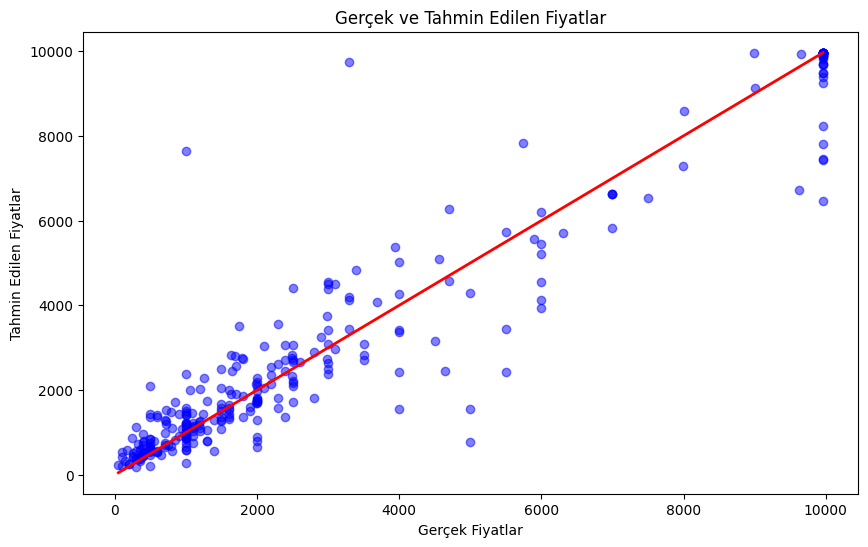

In [79]:
# Ger√ßek ve tahmin edilen deƒüerleri alƒ±n
y_pred = model.predict(X_test)

# Ger√ßek ve tahmin edilen deƒüerlerin kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Ger√ßek ve Tahmin Edilen Fiyatlar')
plt.xlabel('Ger√ßek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.show()

# Hata Hesaplama

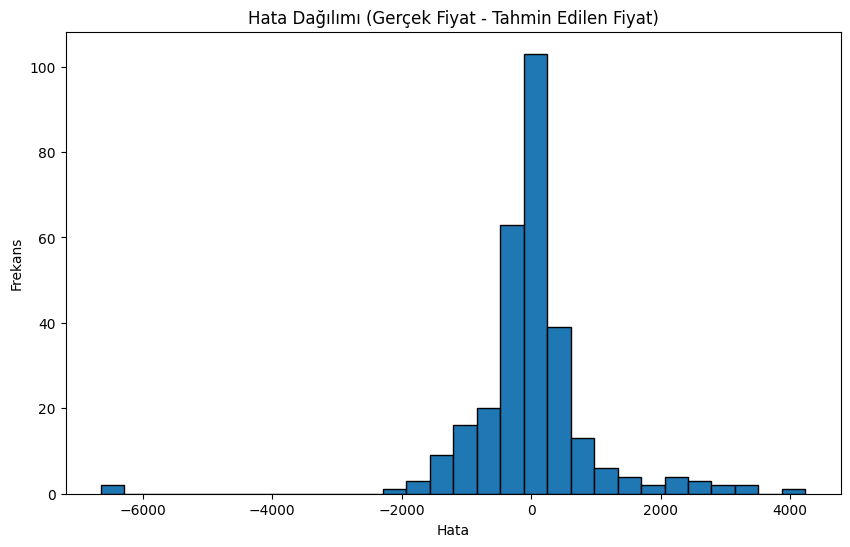

In [80]:
# Hata hesaplama
errors = y_test - y_pred

# Hata daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Hata Daƒüƒ±lƒ±mƒ± (Ger√ßek Fiyat - Tahmin Edilen Fiyat)')
plt.xlabel('Hata')
plt.ylabel('Frekans')
plt.show()


# √ñzelliklerin √ñnem Derecesi

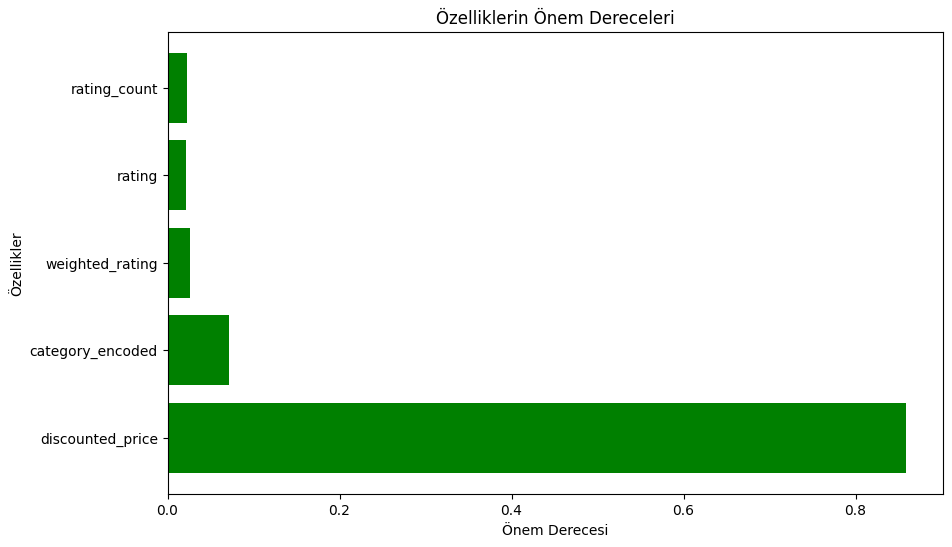

In [81]:


feature_importances = model.feature_importances_
features = X.columns

# √ñzelliklerin √∂nem derecesini g√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='green')
plt.title('√ñzelliklerin √ñnem Dereceleri')
plt.xlabel('√ñnem Derecesi')
plt.ylabel('√ñzellikler')
plt.show()
